<a href="https://colab.research.google.com/github/grizzler88/Springboard/blob/master/Capstone%20-%20Fantasy%20Draft%20Strategy/FantasyNFL_Capstone_Modelling_(Updated_v3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 1: Fantasy NFL (Modelling)

The next step for my Capstone project is to take my data from the preprocessing stage and use it to test out a number of models to see which performs best.

## Getting Started

### Import packages & load data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
#X_train_df = pd.read_csv('X_train_df.csv')
#df.head()

### Review & Transform Data

#### Drop Columns

Data has unnamed column 'Unnamed: 0' from import that is not of value and should be removed. 

In [16]:
#X_train.head()
#X_test.head()
#y_train.head()
#y_test.head()
#X_train_df.head()

In [78]:
X_train = X_train.drop(columns='Unnamed: 0')
X_test = X_test.drop(columns='Unnamed: 0')
y_train = y_train.drop(columns='Unnamed: 0')
y_test = y_test.drop(columns='Unnamed: 0')
#X_train_df = X_train_df.drop(columns='Unnamed: 0')

In [18]:
#X_train.head()
#X_test.head()
#y_train.head()
#y_test.head()
#X_train_df.head()

#### Turn Data into Arrays

Transform datasets into numpy arrays to allow them be used in modelling.

In [73]:
X_cols = list(X_train.columns)
#X_cols 

In [79]:
#X_train = np.array(X_train)
#X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16807, 19)
(5603, 19)
(16807,)
(5603,)


## Modelling

'FAN_ACTUAL' is the target variable of this analysis and is a continuous variable - for this reason we will be focused on Regression.

With the above in mind, we will begin with simple regression models and look to expand on this once we get a sense of how the model is performing.

### Linear Regression

#### StatsModel OLS (Model 1)

For our initial model, we will use an OLS using StatsModel's OLS function. This provides us with some interesting results:

* R-squared = 0.364 
   * This suggest that the model currently explains 36.4% of the variance in our target variable 'FAN_ACTUAL'
   * This drops slightly to 0.363 when we look R-squared adjusted which may suggest that some of the independent variable / features are not contributed to the model as hoped


* F-statistic is significant 
  * This allows us to can reject the null that the coefficients in model are 0 and do not imporve the model's fit

* Durbin-Watson of 2.047 
  * Suggests the model does not suffer from Autocorrelation

* Skew (1.12) and Kurtosis (5.82)
  * This indicates that there is positive / right-hand skew to the data with outliers. This agrees with what we found out during our EDA.

* Coefficients
  * Large number of features are considered significant at 5% level including:   
    * 'FAN_AVG', 'PASSCOMP_AVG', 'PASSYDS_300_AVG', 'RUSHATT_AVG', 'RUSHTD_AVG', 'FUMLST_AVG', 'TGTS_AVG', 'RECTD_AVG', 'RECTD_AVG', 'WIN/TIE_AVG', 'OPP_PTS_AGT_AVG', 'HOME', 'GRASS' (4.8%), 'POS_WR', 'MONTH_September'
  * Some coefficients were not considered signicant including:
    * 'DOME', 'SUNDAY', 'POS_TE', 'TIME_Night', 'TIME_Noon' 

* Mean Squared Error is 40.85



In [22]:
import statsmodels.api as sm

X_train_OLS = pd.DataFrame(X_train, columns=X_cols)
X_train_OLS = sm.add_constant(X_train_OLS)

OLS = sm.OLS(y_train, X_train_OLS)
OLS = OLS.fit()

print(OLS.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     504.7
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:51:48   Log-Likelihood:                -55023.
No. Observations:               16807   AIC:                         1.101e+05
Df Residuals:                   16787   BIC:                         1.102e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0974      0.258     

In [23]:
y_pred = OLS.predict(X_train_OLS)

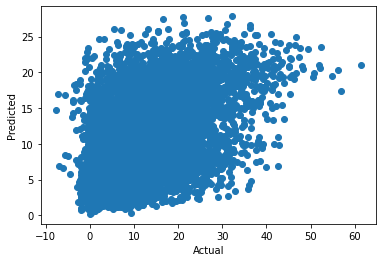

In [24]:
_ = plt.scatter(x=y_train, y=y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

plt.show()

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

OLS_mse = mean_squared_error(y_train, y_pred)

print('Mean Squared Error :',mean_squared_error(y_train, y_pred))

Mean Squared Error : 40.84581476745089


#### StatsModel OLS (Model 2)

I repeated the OLS model but removed the non-significant features from the model to understand how this would impact on the model. This created the following result:

* All coefficients are significant at 5% level

* R-squared has dropped slightly to 0.363

* Mean-squared error has increased to 40.85

As both the R-squared and the MSE performed slightly worse in this model, we will not continue with this feature set going forward. 

In [27]:
X_train_OLS = X_train_OLS.drop(columns=['DOME', 'SUNDAY', 'POS_TE', 'TIME_Night', 'TIME_Noon'])
X_train_OLS = sm.add_constant(X_train_OLS)

OLS = sm.OLS(y_train, X_train_OLS)
OLS = OLS.fit()

print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     685.0
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:04:50   Log-Likelihood:                -55025.
No. Observations:               16807   AIC:                         1.101e+05
Df Residuals:                   16792   BIC:                         1.102e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.1293      0.106     

In [28]:
y_pred = OLS.predict(X_train_OLS)

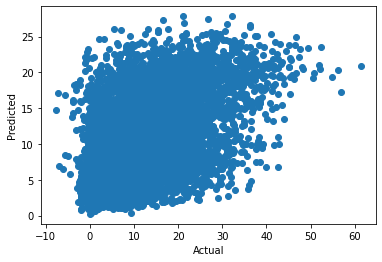

In [29]:
_ = plt.scatter(x=y_train, y=y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

plt.show()

In [30]:
OLS_mse = mean_squared_error(y_train, y_pred)

print('Mean Squared Error :',mean_squared_error(y_train, y_pred))

Mean Squared Error : 40.851023199181554


#### Skearn Linear Regression

Finally, we will apply this linear regression using sklearn. This is the same OLS estimator as StatsModel but does not give as detail a summary table as available there.

Running the model below shows the estimator gets the same R-squared and MSE as our intial model.

In [31]:
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_pred = lm_model.predict(X_train)

lm_mse = mean_squared_error(y_train, y_pred)
lm_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.36
Mean Squared Error : 40.85


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores_train= cross_val_score(lm_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

lm_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 41.0
Mean Squared Error (CV STD) : 1.35


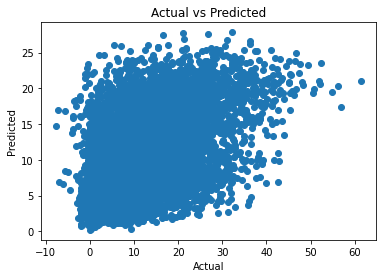

In [33]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

### SGD Regressor

#### Simple SGD Regressor

Next I will look to apply a Stochastic Gradient Descent (SGD) Regressor model to the data. 

This is a linear model that is fitted by minimizing a regularized empirical loss with SGD - the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [34]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(random_state=42)
sgd_model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
y_pred = sgd_model.predict(X_train)

sgd_mse = mean_squared_error(y_train, y_pred)
sgd_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.36
Mean Squared Error : 40.88


In [36]:
cv_scores_train= cross_val_score(sgd_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

sgd_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 41.15
Mean Squared Error (CV STD) : 1.35


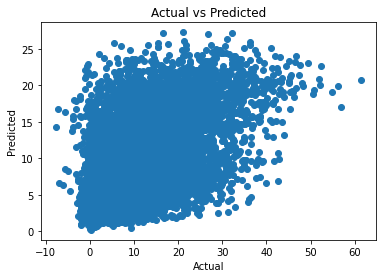

In [37]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

#### SGD Regressor with Cross Validation

The last SGD model was fitted with default values used for the majority of the parameters. With the aim of improving the performance of this model, I will look to use cross-validation to test out the performance of the model across several parameters including:
* Loss function
* Regularisation penalty
* Regularisation value (alpha)
* Learning rate
* Initial Learning Rate

However, despite this hyperparameter tuning, there is little improvement in performance with MSE and R-squared remaining at similar levels.


In [38]:
loss = ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = [0.01, 0.1, 1, 10, 100]

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           eta0=eta0)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

sgdcv_model = RandomizedSearchCV(estimator=sgd_model,
                            param_distributions=param_distributions,
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1,
                            n_iter=1000, random_state=42)
sgdcv_model.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=42,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0.1, verbose=0,
                                          warm_...
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'e

In [42]:
print('Best MSE Score: ', round(abs(sgdcv_model.best_score_), 2))
print('Best Params: ', sgdcv_model.best_params_)

Best MSE Score:  40.99
Best Params:  {'penalty': 'l1', 'loss': 'squared_loss', 'learning_rate': 'adaptive', 'eta0': 0.01, 'alpha': 0.01}


In [43]:
y_pred = sgdcv_model.predict(X_train)

sgdcv_mse = mean_squared_error(y_train, y_pred)
sgdcv_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.36
Mean Squared Error : 40.85


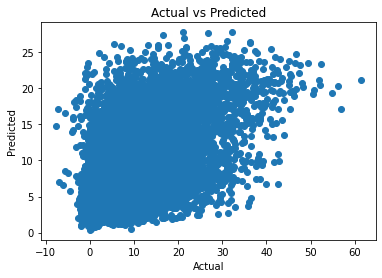

In [44]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

#### Optimal SGD Regressor

Finally, we set the optimal parameters set out by CV into our final SGD model as cross validate the scoring on MSE - this shows a slightly lower MSE of 40.99 compared to 41.15. 

In [46]:
sgd_opt_model = SGDRegressor(penalty='l1', loss='squared_loss', learning_rate='adaptive', eta0=0.01, alpha=0.01, random_state=42)
sgd_opt_model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [47]:
y_pred = sgd_opt_model.predict(X_train)

sgd_opt_mse = mean_squared_error(y_train, y_pred)
sgd_opt_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.36
Mean Squared Error : 40.85


In [48]:
cv_scores_train= cross_val_score(sgd_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

sgd_opt_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 40.99
Mean Squared Error (CV STD) : 1.35


### ElasticNet

#### Simple ElasticNet Model

ElasticNet is a linear regression model trained with both l1 and l2
-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of l1 and l2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

We will start building this model using a simple ElasticNet model with no tuning of hyperparameters. This performs worse than our previous Linear and SGD models with a higher MSE and R-squared.

In [49]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(random_state=42)
en_model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
y_pred = en_model.predict(X_train)

en_mse = mean_squared_error(y_train, y_pred)
en_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.3
Mean Squared Error : 44.63


In [51]:
cv_scores_train= cross_val_score(en_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

en_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 44.66
Mean Squared Error (CV STD) : 1.75


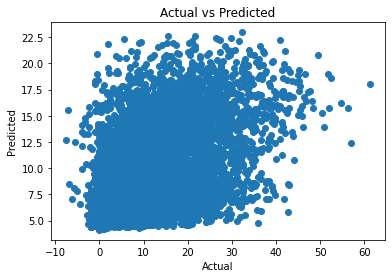

In [52]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

#### Tuning the Hyperparamaters

The last ElasticNet model was fitted with default values used for the majority of the parameters. With the aim of improving the performance of this model, I will look to use cross-validation to test out the performance of the model across several parameters including:
* Regularisation penalty mixing value (l1_ratios)
* Regularisation penalty constant value (alpha)


This finds the optimal SGD model for this data and improves performance marginally - with the MSE score up to 40.85 (from 44.63) and R-squared to 36% (from 30%). 

These scores are nearly exactly the same as our SGD Regressor with CV.

In [53]:
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

param_grid = dict(l1_ratios=l1_ratios, alphas=alphas)

In [54]:
from sklearn.linear_model import ElasticNetCV

encv_model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5, max_iter=10000, random_state=42)
encv_model.fit(X_train, y_train)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1], copy_X=True,
             cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
             verbose=0)

In [55]:
print('Best Alpha: ', encv_model.alpha_)
print('Best L1 ratio: ', encv_model.l1_ratio_)
#print(encv_model.intercept_)
#print(encv_model.coef_)
#print(encv_model.mse_path_)
#print(encv_model.alphas_)

Best Alpha:  0.01
Best L1 ratio:  1.0


In [56]:
y_pred = encv_model.predict(X_train)

encv_mse = mean_squared_error(y_train, y_pred)
encv_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 3))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.36
Mean Squared Error : 40.85


In [57]:
cv_scores_train= cross_val_score(encv_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

encv_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 40.99
Mean Squared Error (CV STD) : 1.35


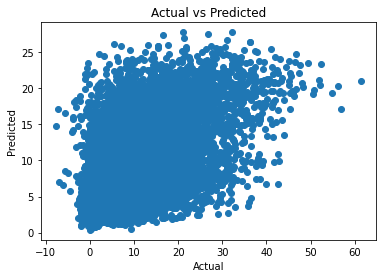

In [58]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

#### Optimal ElasticNet

Lastly, we will input the optimal parameters from our cross-validation into our final Elastic Net model.

When comparing MSE using cross-validation, this shows significant improvement to 40.99 from 44.66 in our simple model.

In [60]:
en_opt_model = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

en_opt_model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
y_pred = en_opt_model.predict(X_train)

en_opt_mse = mean_squared_error(y_train, y_pred)
en_opt_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.36
Mean Squared Error : 40.85


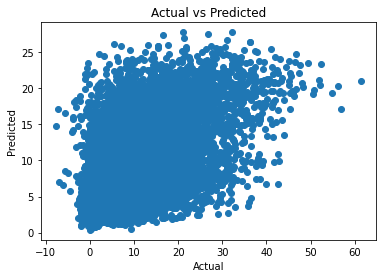

In [63]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

In [62]:
cv_scores_train= cross_val_score(en_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

en_opt_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 40.99
Mean Squared Error (CV STD) : 1.35


### Random Forest Regressor

#### Simple Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

We will begin with a simple Random Forest. This initially shows fantastic results with an MSE of 6.17 and R-squared of 90%, however this initial view is prone to overfitting of the data. When we apply cross-validation of the model for MSE, we see this 44.25 - showing this model still needs a bit of work to generalise better.

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [82]:
y_pred = rf_model.predict(X_train)

rf_mse = mean_squared_error(y_train, y_pred)
rf_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.9
Mean Squared Error : 6.17


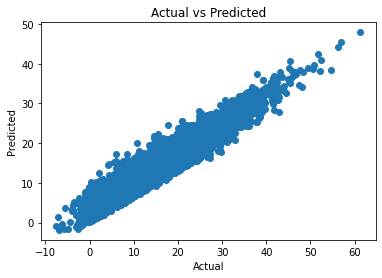

In [83]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

In [86]:
cv_scores_train= cross_val_score(rf_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

rf_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 44.25
Mean Squared Error (CV STD) : 1.23


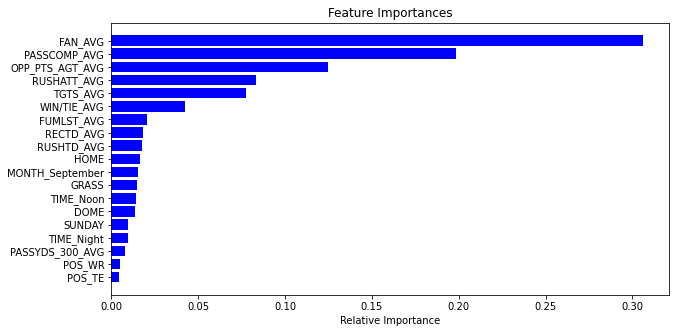

           Features  Importance scores
0           FAN_AVG           0.305989
1      PASSCOMP_AVG           0.198201
9   OPP_PTS_AGT_AVG           0.124853
3       RUSHATT_AVG           0.083164
6          TGTS_AVG           0.077321
8       WIN/TIE_AVG           0.042529
5        FUMLST_AVG           0.020503
7         RECTD_AVG           0.018214
4        RUSHTD_AVG           0.017907
10             HOME           0.016773
16  MONTH_September           0.015244
12            GRASS           0.014687
18        TIME_Noon           0.014479
11             DOME           0.013750
13           SUNDAY           0.009670
17       TIME_Night           0.009445
2   PASSYDS_300_AVG           0.007963
15           POS_WR           0.004894
14           POS_TE           0.004412


In [147]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

imp_table = pd.DataFrame(list(zip(features,importances)),columns =['Features', 'Importance scores'])
imp_table = imp_table.sort_values(by='Importance scores', ascending=False)
print(imp_table)

#### Tuning the Hyperparameters

To tune the model, we will look at three areas:
* Number of estimators
* Depth of decision trees
* Number of features per decision tree

Applying this show that the best results are found using 1,000 estimators at a max depth of 10 and using square root of the total number of features in dataset per decision tree.

Doing this improved the performance to 32.05 MSE and R-squared of 50%. However, we still need to see if this generalises which we will test in next section.

In [87]:
param_grid = {  'n_estimators': [100, 500, 1000],
                'max_depth': [3, 5, 10],
                'max_features': ['auto', 'sqrt'],
                'criterion': ['mse']
             }


In [88]:
from sklearn.model_selection import GridSearchCV

rfcv_model = GridSearchCV(rf_model,
                            param_grid, cv=5,
                            scoring='neg_mean_squared_error', n_jobs=-1)
rfcv_model = rfcv_model.fit(X_train, y_train)


In [89]:
print('Best Score: ', rfcv_model.best_score_)
print('Best Params: ', rfcv_model.best_params_)
print('Best Model: ', rfcv_model.best_estimator_)

Best Score:  -41.43974424992231
Best Params:  {'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
Best Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [90]:
y_pred = rfcv_model.predict(X_train)

rfcv_mse = mean_squared_error(y_train, y_pred)
rfcv_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.5
Mean Squared Error : 32.05


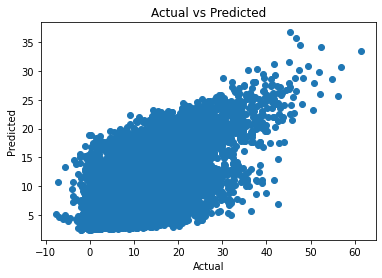

In [91]:
_ = plt.scatter(y_train, y_pred)
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Actual vs Predicted')

plt.show()

In [146]:
#rfcv_model.cv_results_

#### Optimal Random Forest Model

We applied the optimal paramaters to create are optimal Random Forest Regressor. After cross-validation, this shows us that the MSE performs at 41.44 - which is slightly behind some of the early models.

This model also shows us which features are most important to the model. Not surprisingly, 'FAN_AVG' is considered the most important feature - seeming to confirm what we found in our EDA section.

In [109]:
rf_opt_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

rf_opt_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [110]:
y_pred = rf_opt_model.predict(X_train)

rf_opt_mse = mean_squared_error(y_train, y_pred)
rf_opt_r2 = r2_score(y_train, y_pred)

print('R-squared :', round(r2_score(y_train, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_train, y_pred), 2))

R-squared : 0.5
Mean Squared Error : 32.05


In [111]:
cv_scores_train= cross_val_score(rf_opt_model, X_train ,y_train ,cv=5 ,scoring='neg_mean_squared_error')

#print(cv_scores_train)
print('Mean Squared Error (CV mean) :', round(abs(cv_scores_train.mean()), 2))
print('Mean Squared Error (CV STD) :', round(cv_scores_train.std(), 2))

rf_opt_mse_cv = cv_scores_train.mean()

Mean Squared Error (CV mean) : 41.44
Mean Squared Error (CV STD) : 1.5


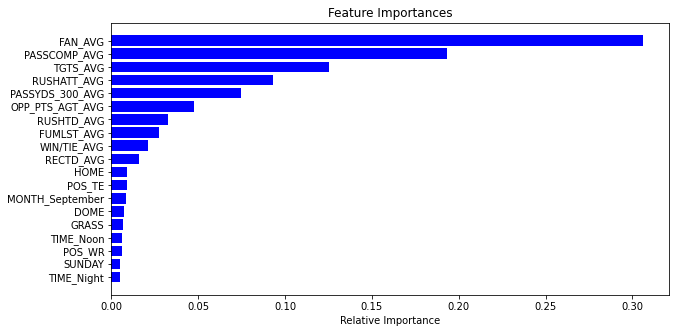

           Features  Importance scores
0           FAN_AVG           0.305913
1      PASSCOMP_AVG           0.193205
6          TGTS_AVG           0.125453
3       RUSHATT_AVG           0.093023
2   PASSYDS_300_AVG           0.074580
9   OPP_PTS_AGT_AVG           0.047499
4        RUSHTD_AVG           0.032549
5        FUMLST_AVG           0.027375
8       WIN/TIE_AVG           0.021320
7         RECTD_AVG           0.015940
10             HOME           0.009131
14           POS_TE           0.008972
16  MONTH_September           0.008561
11             DOME           0.007026
12            GRASS           0.006994
18        TIME_Noon           0.006248
15           POS_WR           0.006068
13           SUNDAY           0.005099
17       TIME_Night           0.005044


In [145]:
features = X_train.columns
importances = rf_opt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

imp_table = pd.DataFrame(list(zip(features,importances)),columns =['Features', 'Importance scores'])
imp_table = imp_table.sort_values(by='Importance scores', ascending=False)
print(imp_table)

## Comparing Models

In the previous section, we developed our models to find the optimal for Linear, SGD Regrossor, ElasticNet and Random Forest Regressor. Following this, we found out the following:
* Training Data (Without Cross-Validation): Random Forest is the best model by significant margin over the other models in regards MSE and R-squared
* Training Data (With Cross-Validation): Random Forest is the worst performing model in relation to MSE, with the other three models performing roughly the same
* Test Data: Random Forest flips and becomes the best performing model - performing at a similar level to that as with Training data (with cross-validation). The three other models did not generalise as well to the test data with slightly higher MSE.


### Simple Models (with no Hyper-parameter tuning)

#### Without Cross-Validation

In [148]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest']
model_mse = [lm_mse, sgd_mse, en_mse, rf_mse]
model_r2 = [lm_r2, sgd_r2, en_r2, rf_r2]

In [149]:
performance_df = pd.DataFrame(list(zip(model_names, model_mse, model_r2)), columns=['Model', 'MSE', 'R2 Score'])

In [150]:
performance_df.sort_values(by='MSE')

,Model,MSE,R2 Score
3,Random Forest,6.168015,0.903896
0,Linear,40.845815,0.363580
1,SGD,40.884930,0.362970
2,ElasticNet,44.632883,0.304573


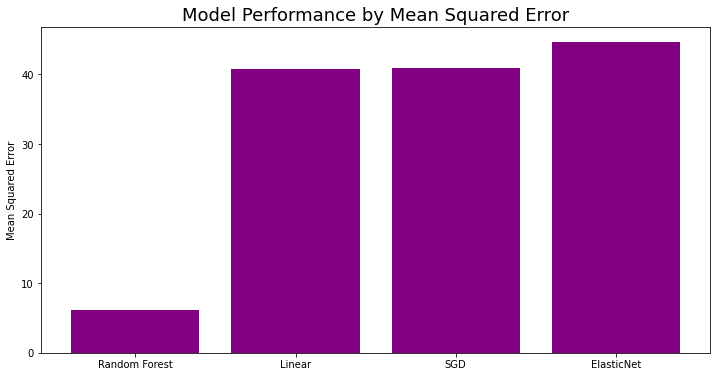

In [151]:
performance_df = performance_df.sort_values(by='MSE')

_ = plt.figure(figsize=(12,6))
_ = plt.bar(performance_df['Model'], performance_df['MSE'], color='purple')
_ = plt.ylabel('Mean Squared Error')
_ = plt.title('Model Performance by Mean Squared Error', fontsize=18)

plt.show()

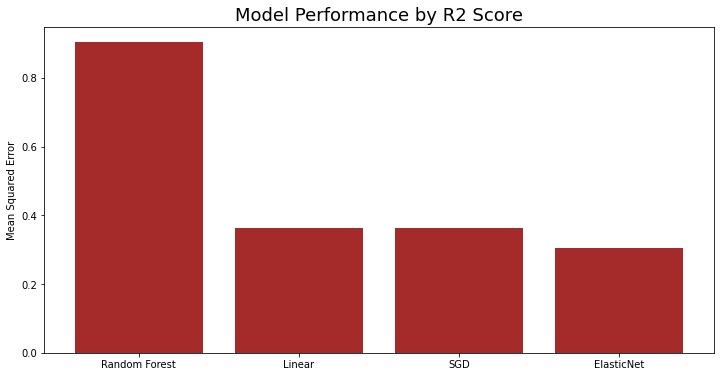

In [152]:
performance_df = performance_df.sort_values(by='R2 Score', ascending=False)

_ = plt.figure(figsize=(12,6))
_ = plt.bar(performance_df['Model'], performance_df['R2 Score'], color='brown')
_ = plt.ylabel('Mean Squared Error')
_ = plt.title('Model Performance by R2 Score', fontsize=18)

plt.show()

#### With Cross-validation

In [153]:
performance_df = performance_df.sort_index()
performance_df['MSE'] = [abs(lm_mse_cv), abs(sgd_mse_cv), abs(en_mse_cv), abs(rf_mse_cv)]
performance_df.drop(columns='R2 Score', inplace=True)
performance_df.sort_values(by='MSE')

,Model,MSE
0,Linear,40.996690
1,SGD,41.149281
3,Random Forest,44.251051
2,ElasticNet,44.664382


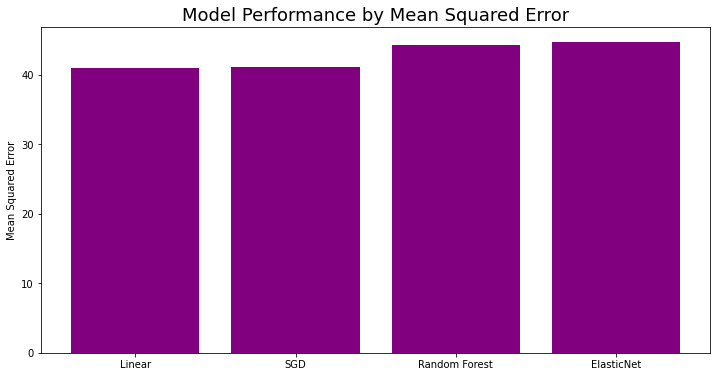

In [154]:
performance_df = performance_df.sort_values(by='MSE')

_ = plt.figure(figsize=(12,6))
_ = plt.bar(performance_df['Model'], performance_df['MSE'], color='purple')
_ = plt.ylabel('Mean Squared Error')
_ = plt.title('Model Performance by Mean Squared Error', fontsize=18)

plt.show()

### Optimal Models (after Hyperparameter Tuning)

#### Without Cross Validation

In [155]:
performance_df = performance_df.sort_index()
performance_df['MSE'] = [lm_mse, sgd_opt_mse, en_opt_mse, rf_opt_mse]
performance_df['R2 Score'] = [lm_r2, sgd_opt_r2, en_opt_r2, rf_opt_r2]
performance_df.sort_values(by='MSE')
performance_df

,Model,MSE,R2 Score
0,Linear,40.845815,0.363580
1,SGD,40.853045,0.363467
2,ElasticNet,40.852538,0.363475
3,Random Forest,32.049714,0.500632


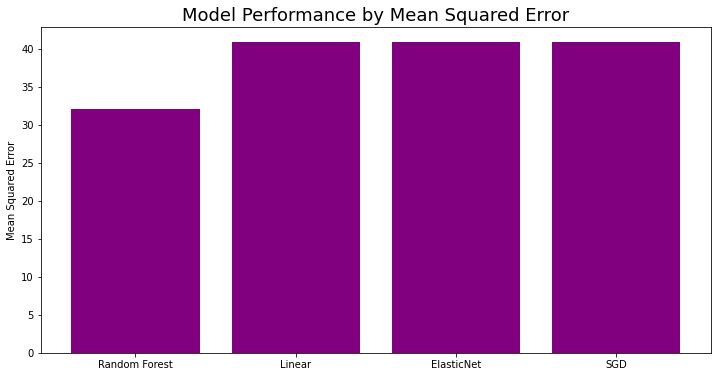

In [156]:
performance_df = performance_df.sort_values(by='MSE')

_ = plt.figure(figsize=(12,6))
_ = plt.bar(performance_df['Model'], performance_df['MSE'], color='purple')
_ = plt.ylabel('Mean Squared Error')
_ = plt.title('Model Performance by Mean Squared Error', fontsize=18)

plt.show()

performance_df = performance_df.sort_values(by='R2 Score', ascending=False)

_ = plt.figure(figsize=(12,6))
_ = plt.bar(performance_df['Model'], performance_df['R2 Score'], color='brown')
_ = plt.ylabel('Mean Squared Error')
_ = plt.title('Model Performance by R2 Score', fontsize=18)

plt.show()

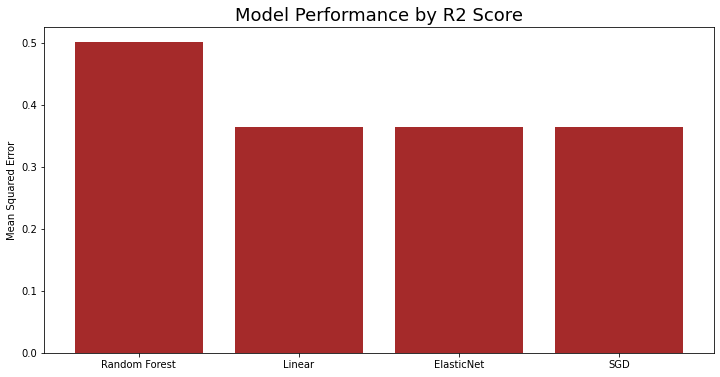

#### With Cross Validation

In [158]:
performance_df = performance_df.sort_index()
performance_df['MSE'] = [abs(lm_mse_cv), abs(sgd_opt_mse_cv), abs(en_opt_mse_cv), abs(rf_opt_mse_cv)]
performance_df.drop(columns='R2 Score', inplace=True)
performance_df.sort_values(by='MSE')


,Model,MSE
1,SGD,40.986640
2,ElasticNet,40.986819
0,Linear,40.996690
3,Random Forest,41.439744


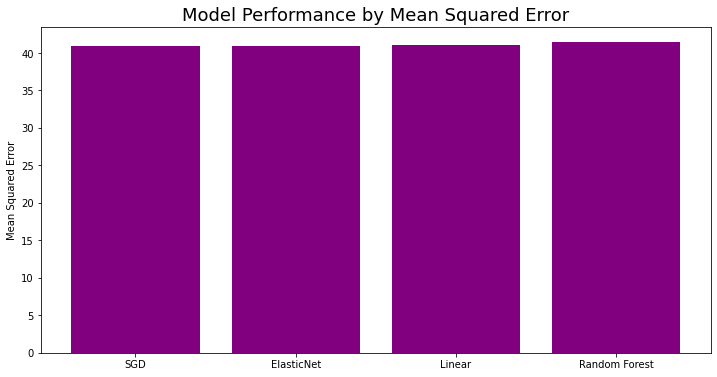

In [159]:
performance_df = performance_df.sort_values(by='MSE')

_ = plt.figure(figsize=(12,6))
_ = plt.bar(performance_df['Model'], performance_df['MSE'], color='purple')
_ = plt.ylabel('Mean Squared Error')
_ = plt.title('Model Performance by Mean Squared Error', fontsize=18)

plt.show()

### Apply to Test Data

In [160]:
y_pred = lm_model.predict(X_test)

lm_test_mse = mean_squared_error(y_test, y_pred)
lm_test_r2 = r2_score(y_test, y_pred)

print('R-squared :', round(r2_score(y_test, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_test, y_pred), 2))

R-squared : 0.35
Mean Squared Error : 41.56


In [161]:
y_pred = sgd_opt_model.predict(X_test)

sgd_test_mse = mean_squared_error(y_test, y_pred)
sgd_test_r2 = r2_score(y_test, y_pred)

print('R-squared :', round(r2_score(y_test, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_test, y_pred), 2))

R-squared : 0.35
Mean Squared Error : 41.55


In [162]:
y_pred = en_opt_model.predict(X_test)

en_test_mse = mean_squared_error(y_test, y_pred)
en_test_r2 = r2_score(y_test, y_pred)

print('R-squared :', round(r2_score(y_test, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_test, y_pred), 2))

R-squared : 0.35
Mean Squared Error : 41.55


In [163]:
y_pred = rf_opt_model.predict(X_test)

rf_test_mse = mean_squared_error(y_test, y_pred)
rf_test_r2 = r2_score(y_test, y_pred)

print('R-squared :', round(r2_score(y_test, y_pred), 2))
print('Mean Squared Error :', round(mean_squared_error(y_test, y_pred), 2))

R-squared : 0.35
Mean Squared Error : 41.42


In [168]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest']
model_mse = [round(lm_test_mse, 2), round(sgd_test_mse, 2), round(en_test_mse, 2), round(rf_test_mse, 2)]
model_r2 = [round(lm_test_r2, 2), round(sgd_test_r2, 2), round(en_test_r2, 2), round(rf_test_r2, 2)]

In [169]:
test_performance_df = pd.DataFrame(list(zip(model_names, model_mse, model_r2)), columns=['Model', 'MSE', 'R2 Score'])

In [170]:
test_performance_df.sort_values(by='MSE')

,Model,MSE,R2 Score
3,Random Forest,41.42,0.35
1,SGD,41.55,0.35
2,ElasticNet,41.55,0.35
0,Linear,41.56,0.35


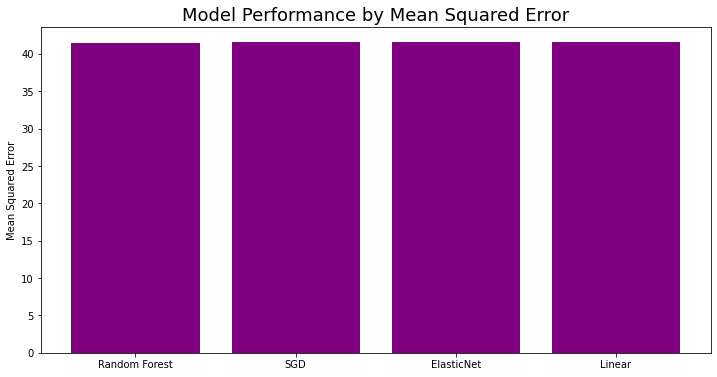

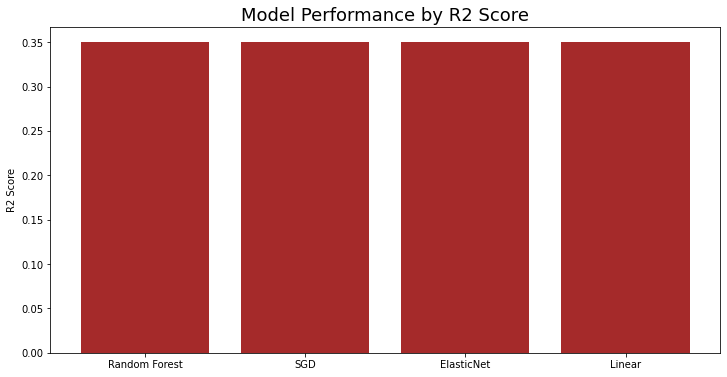

In [173]:
test_performance_df = test_performance_df.sort_values(by='MSE')

_ = plt.figure(figsize=(12,6))
_ = plt.bar(test_performance_df['Model'], test_performance_df['MSE'], color='purple')
_ = plt.ylabel('Mean Squared Error')
_ = plt.title('Model Performance by Mean Squared Error', fontsize=18)

plt.show()

test_performance_df = test_performance_df.sort_values(by='R2 Score', ascending=False)

_ = plt.figure(figsize=(12,6))
_ = plt.bar(test_performance_df['Model'], test_performance_df['R2 Score'], color='brown')
_ = plt.ylabel('R2 Score')
_ = plt.title('Model Performance by R2 Score', fontsize=18)

plt.show()

### Final Comparison

In [191]:
model_names = ['Linear', 'SGD', 'ElasticNet', 'Random Forest', 'Linear', 'SGD', 'ElasticNet', 'Random Forest']
data_type = ['Train', 'Train', 'Train', 'Train', 'Test', 'Test', 'Test', 'Test']
model_mse = [round(abs(lm_mse), 2), round(abs(sgd_opt_mse_cv), 2), round(abs(en_opt_mse_cv), 2), round(abs(rf_opt_mse_cv), 2), round(lm_test_mse, 2), round(sgd_test_mse, 2), round(en_test_mse, 2), round(rf_test_mse, 2)]
model_rmse = np.sqrt(model_mse)

In [192]:
overall_performance_df = pd.DataFrame(list(zip(model_names,data_type, model_mse, model_rmse)), columns=['Model', 'Data Type', 'MSE', 'RMSE'])

In [193]:
overall_performance_df

,Model,Data Type,MSE,RMSE
0,Linear,Train,40.85,6.391400
1,SGD,Train,40.99,6.402343
2,ElasticNet,Train,40.99,6.402343
3,Random Forest,Train,41.44,6.437391
4,Linear,Test,41.56,6.446705
5,SGD,Test,41.55,6.445929
6,ElasticNet,Test,41.55,6.445929
7,Random Forest,Test,41.42,6.435837


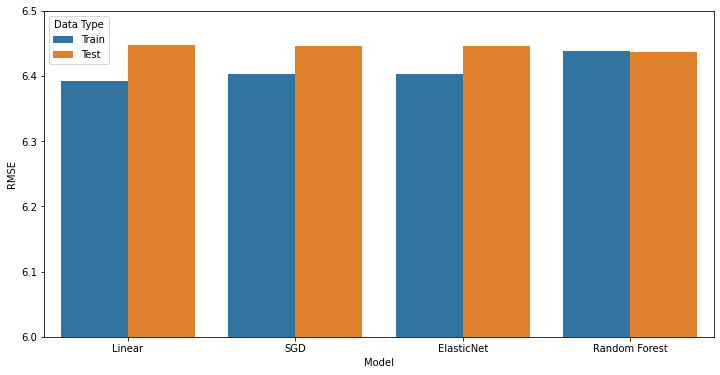

In [197]:
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(x='Model', y='RMSE', hue='Data Type', data=overall_performance_df)
_ = plt.ylim([6, 6.5])

plt.show()

## Conclusion

The aim of our model was to understand what features could be used to predict future Fantasy Football performance. To acheive this I:
* Identified 19 features that could be used to understand and predict future fantasy football performance (majority of this work was done at EDA and Pre-processing stage to identify best features for this modelling)
* As our target variable was continuous, I looked a 4 different type of regression models:
  1. Linear / OLS Regression
  2. SGD Regressor
  3. ElasticNet
  4. Random Forest Regressor
* For each of these model, I look to tune the hyperparamaters to identify the optimal model for each. 
* For each model, I measure their performance using both the R-squared and Mean-squared Error - both to highlight difference from tuning individual model as well as how they compare with each other
* Cross-validating the model on the training data showed that our Linear Regression performance best
* On our test data, our Random Forest Regressor performed best and had the least variance from from training CV to test performance.
* Due to the stability of the Random Forest Regressor, I would be inclined to recommend this model going forward as the best model for prediction of Fantasy Football performance. This model:
  * On average, it will predict a player's fantasy performance +/- 6.44 fantasy points
  * Previous Fantasy performance is the best indicator of future fantasy performance (when looking at a 4-week period)
  * Pass completion, Targets, and Rushing attempts are the next most important features which make sense given they are indicators for each of the key positions on the field - QB, RB, WR/TE 


### Next Steps

The model is a good first step in attempting to understanding what influences Fantasy Performance. However, future studies would like to reduce that margin of error down from a RMSE of 6.44 because as all fantasy players know, that one point can be the difference between joy and despair on a given NFL weekend. A couple of options that could be explored would be:
* I used a 4-week rolling average of performance metrics but different week periods could be applied to see how they impact on performance
* Clusters were identified during the EDA of this project and could be used to turn this into a Classification problem to see how accurately you can predict if a player will fit into a particular cluster
* This cluster analysis also identified that I high majority of the dataset produce relatively low scores on a weekly basis and would not be of interest to Fantasy players. Refining the data to exclude players of certain performance level would initially reduce the size of the dataset but may produce more meanignful results for fantasy players.
* New metrics and / or data sources could be included into the analysis to see if these are better predictors (i.e. offensive line performance, QB performance)
* Focus on position level as different metrics are likely to have bigger impact by position. This would again reduce the size of the dataset but could produce more meaningful results.
* Look at different types of regression models (i.e. Support Vector Model) to see how this performs.
* Different approach for feature engineering (i.e. Principal Component Analysis)